In [1]:
from sklearn.datasets import load_iris
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()

In [39]:
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.3,random_state=30)

In [45]:
dtc = DecisionTreeClassifier(random_state = 42, criterion="gini")

In [46]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [47]:
y_pred = dtc.predict(X_test)

In [48]:
Accuracy = accuracy_score(y_test,y_pred)
Precision = precision_score(y_test,y_pred,average="macro")
Recall = recall_score(y_test,y_pred,average="macro")
F1 = f1_score(y_test,y_pred,average="macro")

In [49]:
print(f"""
          Accuracy:{Accuracy}
          Precision:{Precision}
          Recall:{Recall}
          F1:{F1}""")


          Accuracy:0.9555555555555556
          Precision:0.9568151147098516
          Recall:0.9568151147098516
          F1:0.9568151147098516


# Decision Tree Rewrite

In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
iris = load_breast_cancer()

In [4]:
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.3,random_state=42)

In [5]:
dtc = DecisionTreeClassifier(criterion="gini")

In [7]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [8]:
y_pred = dtc.predict(X_test)

In [9]:
classif = classification_report(y_test,y_pred)

In [10]:
print(classif)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        63
           1       0.97      0.92      0.94       108

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



In [11]:
y_probs = dtc.predict_proba(X_test)[:,1]

In [12]:
auc = roc_auc_score(y_test,y_probs)

In [20]:
cm = confusion_matrix(y_test,y_pred)

In [21]:
print(cm,auc)

[[60  3]
 [ 9 99]] <function auc at 0x7fb117fd2340>


In [14]:
tpr,fpr,_ = roc_curve(y_test,y_probs)

Text(0.5, 1.0, 'Decision Tree AUC Grp')

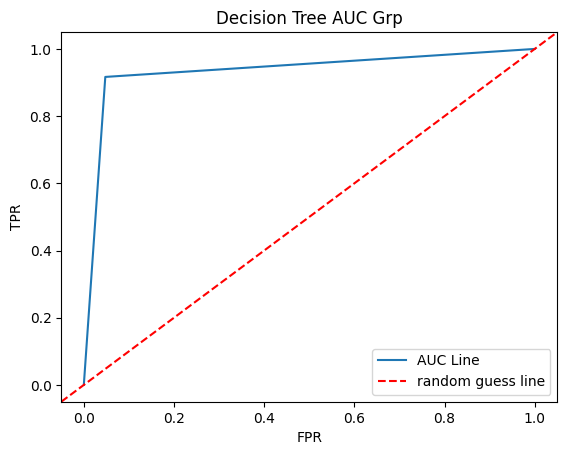

In [29]:
plt.plot(tpr,fpr,label="AUC Line")
plt.axline((0,0),slope = 1,color="red",linestyle="--",label="random guess line")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.title("Decision Tree AUC Grp")